In [558]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [559]:
# Setting random seed for reproducibility
torch.manual_seed(140)
np.random.seed(140)
random.seed(140)

In [560]:

"""
# Load data
x_values = torch.tensor([1, 2, 3]) # X values
y_values = torch.tensor([20, 30, 40]) # Y values

x_values_np = x_values.numpy()
y_values_np = y_values.numpy()

# Plot data
plt.plot(x_values_np, y_values_np)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Values over time')
plt.show()

"""


"\n# Load data\nx_values = torch.tensor([1, 2, 3]) # X values\ny_values = torch.tensor([20, 30, 40]) # Y values\n\nx_values_np = x_values.numpy()\ny_values_np = y_values.numpy()\n\n# Plot data\nplt.plot(x_values_np, y_values_np)\nplt.xlabel('Time')\nplt.ylabel('Values')\nplt.title('Values over time')\nplt.show()\n\n"

In [561]:
# Simulate data 
x_values = torch.tensor([1, 2, 3], dtype=torch.float32).view(-1, 1, 1) # X values
y_values = x_values * 10 # Y values

# Print shapes
print(x_values.shape, x_values.shape)

torch.Size([3, 1, 1]) torch.Size([3, 1, 1])


In [562]:
# Define the LSTM model
class SimpleLSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=10, num_layers=1, batch_first=True)
        self.linear = nn.Linear(10, 1)
    
    def forward(self, x):
        x, _ = self.lstm(x)
        # Extract only the last timestep's output for prediction
       # x = x[:, -1, :]
        x = self.linear(x[:, -1, :])
        return x
    
# Define the GRU model
class SimpleGRU(nn.Module):
    def __init__(self):
        super().__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=10, num_layers=1, batch_first=True)
        self.linear = nn.Linear(10, 1)
    
    def forward(self, x):
        x, _ = self.gru(x)
        # Extract only the last timestep's output for prediction
       # x = x[:, -1, :]
        x = self.linear(x[:, -1, :])
        return x 

Epoch [0/100], Loss: 474.1813049316406
Epoch [5/100], Loss: 60.795166015625
Epoch [10/100], Loss: 21.299331665039062
Epoch [15/100], Loss: 38.20134353637695
Epoch [20/100], Loss: 15.814383506774902


Epoch [25/100], Loss: 19.46661949157715
Epoch [30/100], Loss: 4.739187240600586
Epoch [35/100], Loss: 11.685925483703613
Epoch [40/100], Loss: 5.181562423706055
Epoch [45/100], Loss: 3.4663875102996826
Epoch [50/100], Loss: 1.9997706413269043
Epoch [55/100], Loss: 11.137808799743652
Epoch [60/100], Loss: 2.4162566661834717
Epoch [65/100], Loss: 2.496973991394043
Epoch [70/100], Loss: 2.1083860397338867
Epoch [75/100], Loss: 4.077827453613281
Epoch [80/100], Loss: 0.7491114139556885
Epoch [85/100], Loss: 0.20729707181453705
Epoch [90/100], Loss: 0.14931778609752655
Epoch [95/100], Loss: 0.22643069922924042
Predictions: [ 9.69684  19.327602 29.52702 ]
Actual: [10. 20. 30.]


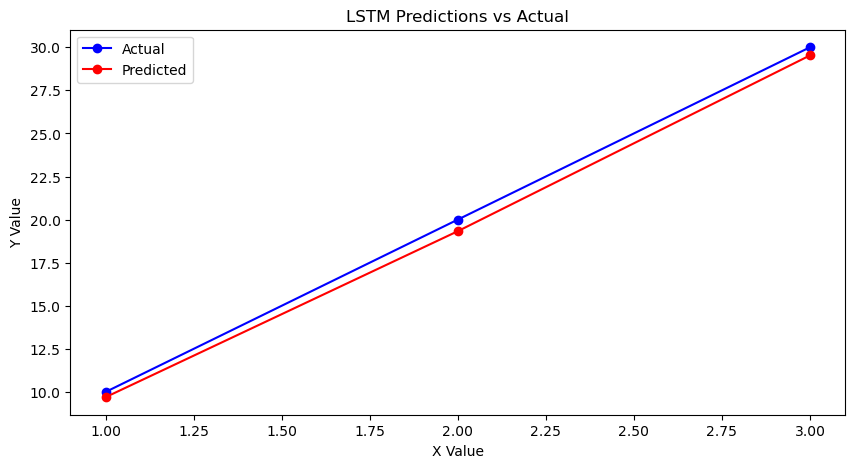

In [563]:
# Initialize the model
model = SimpleLSTM()
#model = SimpleGRU()
optimizer = optim.SGD(model.parameters(), lr=0.05)
loss_fn = nn.MSELoss()


# Train the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_values)
    loss = loss_fn(output, y_values.view(-1, 1))
    loss.backward()
    optimizer.step()
    
    if epoch % 5 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item()}')


model.eval()
with torch.no_grad():
    predictions = model(x_values) 
    print(f"Predictions: {predictions.view(-1).numpy()}")
    print(f"Actual: {y_values.view(-1).numpy()}")

# Visualizing the results
plt.figure(figsize=(10, 5))
plt.plot(x_values.numpy().flatten(), y_values.numpy().flatten(), 'bo-', label='Actual')
plt.plot(x_values.numpy().flatten(), predictions.numpy().flatten(), 'ro-', label='Predicted')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.legend()


